# Tasca M4 T01

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math

## Exercici 1
Descarrega el [dataset adjunt](https://itacademy.barcelonactiva.cat/pluginfile.php/18159/mod_assign/introattachment/0/preu%20lloguer%20per%20trimestre%20i%20barri.csv?forcedownload=1) preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.

Crea almenys una visualització per:

    * Una variable categòrica (Districte o Barri)
    * Una variable numèrica (Preu)
    * Una variable numèrica i una categòrica (Districte i Preu)
    * Dues variables numèriques (Any o Trimestre i Preu)
    * Tres variables (Barri o Districte, Trimestre i Preu)


In [32]:
df = pd.read_csv("preu lloguer per trimestre i barri.csv")

df.dtypes #La columna 'Preu' type = object -> Necesitamos type = float64
df.Preu.unique() #Detectamos el valor que no nos deja modificar objet a float64
df = df[df["Preu"] != "--"] #Eliminamos rows['Preu'] == "--"
df.Preu = df.Preu.astype('float64') 

print(df.dtypes)
df.head()


Any                 int64
Trimestre           int64
Codi_Districte      int64
Nom_Districte      object
Codi_Barri          int64
Nom_Barri          object
Lloguer_mitja      object
Preu              float64
dtype: object


array(['Lloguer mitjà mensual (Euros/mes)',
       'Lloguer mitjà per superfície (Euros/m2 mes)'], dtype=object)

**Una variable categòrica (Districte o Barri)**

*Una variable categórica es aquella que permite clasificar una serie de datos por medio de valores fijos asociados a una cualidad o categoría concreta. La variable categórica, a diferencia de las variables cardinales o continuas (que permiten cálculos numéricos), clasifica a los individuos o casos*

En el caso de nuestro dataframe las variables categoricas serían: 

Trimestre 	Codi_Districte 	Nom_Districte 	Codi_Barri 	Nom_Barri 	Lloguer_mitja




Se realizá un gráfico con el número de entradas por distrito en el dataset.



<BarContainer object of 10 artists>

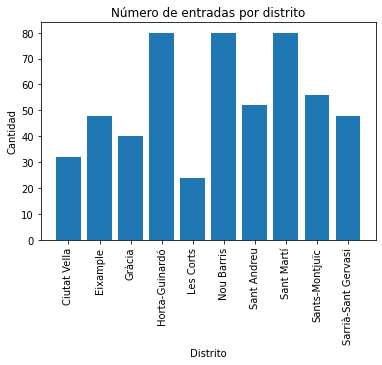

In [7]:
dist = df.groupby(['Nom_Districte'])['Nom_Districte'].count().reset_index(name = "Count")

plt.xlabel('Distrito')
plt.ylabel('Cantidad')
plt.title("Número de entradas por distrito")
plt.xticks(rotation=90)

plt.bar(dist.Nom_Districte, dist.Count)

**Una variable numèrica (Preu)**



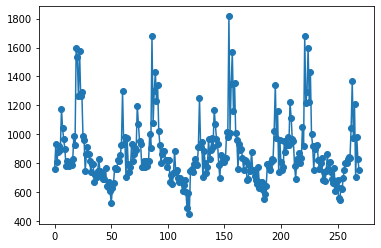

In [23]:
df_Lloguer = df[(df.Lloguer_mitja=="Lloguer mitjà mensual (Euros/mes)")]

plt.plot(np.arange(len(df_Lloguer.Preu)), df_Lloguer.Preu, marker = 'o')

**Una variable numèrica i una categòrica (Districte i Preu)**


Veremos el precio medio de los alquileres por distrito

<BarContainer object of 10 artists>

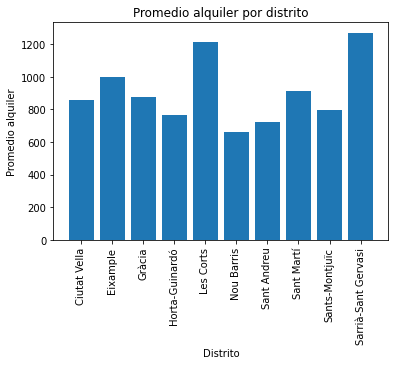

In [24]:
precio_medio = df[(df.Lloguer_mitja=="Lloguer mitjà mensual (Euros/mes)")]

precio_medio = precio_medio.groupby(['Nom_Districte'])['Preu'].mean().reset_index(name = "Mean")
plt.xlabel('Distrito')
plt.ylabel('Promedio alquiler')
plt.title("Promedio alquiler por distrito")
plt.xticks(rotation=90)
plt.bar(precio_medio.Nom_Districte, precio_medio.Mean)

***Dues variables numèriques (Any o Trimestre i Preu)***

Veremos la evolución del precio medio del alquiler por trimestre

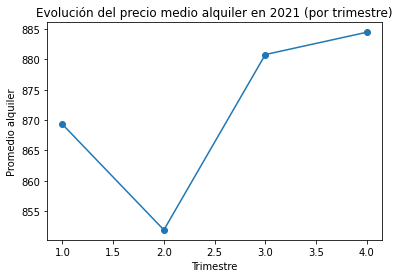

In [10]:
p_trimestre = df[(df.Lloguer_mitja=="Lloguer mitjà mensual (Euros/mes)")]
p_trimestre = p_trimestre.groupby(['Trimestre'])['Preu'].mean().reset_index(name = "Mean")

plt.xlabel('Trimestre')
plt.ylabel('Promedio alquiler')
plt.title("Evolución del precio medio alquiler en 2021 (por trimestre)")

plt.plot(p_trimestre.Trimestre,p_trimestre.Mean,marker = 'o')


**Tres variables (Barri o Districte, Trimestre i Preu)**

1) El primer gráfico es la evolución de los precios del alquiler por trimestre en cada uno de los Distritos

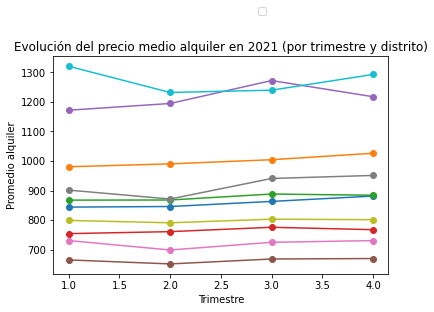

In [27]:
p_dis_t = df[(df.Lloguer_mitja=="Lloguer mitjà mensual (Euros/mes)")]
p_dis_t = p_dis_t.groupby(['Nom_Districte', 'Trimestre'])['Preu'].mean().reset_index(name = "Mean")
p_dis_t = p_dis_t.pivot(index='Trimestre', columns='Nom_Districte', values='Mean')

plt.xlabel('Trimestre')
plt.ylabel('Promedio alquiler')
plt.title("Evolución del precio medio alquiler en 2021 (por trimestre y distrito)")
plt.legend(['Ciutat Vella', 'Eixample', 'Gràcia', 'Horta-Guinardó', 'Les Corts', 'Nou Barris', 'Sant Andreu', 'Sant Martí', 'Sants-Montjuïc', 'Sarrià-Sant Gervasi'], bbox_to_anchor =(0.65, 1.25))

plt.plot(p_dis_t, marker = 'o')

2) El segundo gráfico es un scatterplot sobre los precios medios por distrito en cada uno de los trimestres.

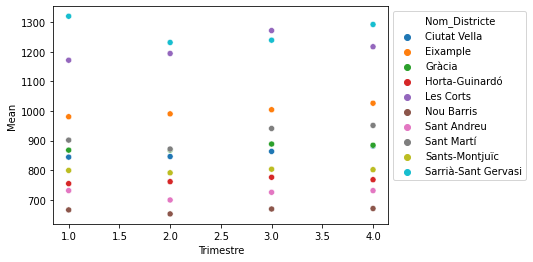

In [22]:
p_dis_t = df[(df.Lloguer_mitja=="Lloguer mitjà mensual (Euros/mes)")]
p_dis_t = p_dis_t.groupby(['Nom_Districte', 'Trimestre'])['Preu'].mean().reset_index(name = "Mean")

ax = sns.scatterplot(x='Trimestre', y='Mean', data=p_dis_t, hue='Nom_Districte')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


## Exercici 2
Exporta els gràfics com imatges o com HTML.



Todas las graficas estan como imagen png en el siguiente enlace de GitHub:

https://github.com/Huanhotze/Sprint-4.-Visualitzacio-grafica-de-dades/tree/main/M4_T01_Graficas_png

## Exercici 3
Proposa alguna visualització que creguis que pot resultar interessant.


Una visualización interesante puede ser un *"scatterplot"* con la distribución del precio de los alquileres respecto al precio m2 y diferenciando cadas punto por distrito.

Text(0.5, 1.0, 'Distribución del precio de los alquileres respecto al precio m2')

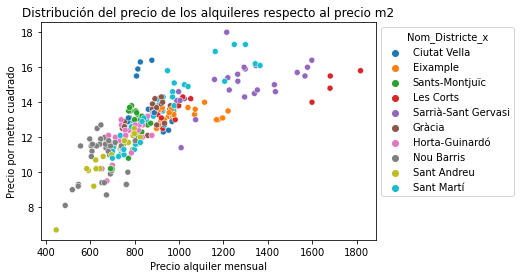

In [62]:
df_Lloguer = df[(df.Lloguer_mitja=="Lloguer mitjà mensual (Euros/mes)")]
df_Superficie = df[(df.Lloguer_mitja=="Lloguer mitjà per superfície (Euros/m2 mes)")]
df_Superficie = df_Superficie.rename(columns={"Preu":"PreuM2"})


dfNew = pd.merge(df_Lloguer.reset_index(), df_Superficie.reset_index(), on=['Trimestre', 'Codi_Districte', 'Codi_Barri'])
ax = sns.scatterplot(x='Preu', y='PreuM2', data=dfNew, hue='Nom_Districte_x')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Precio alquiler mensual')
plt.ylabel('Precio por metro cuadrado')
plt.title("Distribución del precio de los alquileres respecto al precio m2")
